In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import joblib
import sklearn.linear_model as skl_lm
import io
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [27]:
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['NextGpa.csv']))

Saving NextGpa.csv to NextGpa.csv


In [28]:
def marks(mark):
    if(mark>=17):
        return(1)
    elif(mark>=13 and mark<17):
        return(2)
    elif(mark<13):
        return(3)
dataset["TF_gpa_level"]=dataset["TF_gpa"].apply(marks)
dataset["S_gpa_level"]=dataset["S_gpa"].apply(marks)
dataset["TS_gpa_level"]=dataset["TS_gpa"].apply(marks)
dataset["Th_gpa_level"]=dataset["Th_gpa"].apply(marks)

In [29]:
X=dataset[['gender', 'residence', 'entering_type','entering',
       'F_obtained_units', 'TF_gpa_level',
       'S_obtained_units', 'S_gpa_level', 'TS_gpa_level',
       'Th_obtained_units',
       'obtained_units_till_Th', 'f_o', 'p_o', 'terms_last', 'm_t']]
Y=dataset['Th_gpa_level']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, shuffle = True)

              precision    recall  f1-score   support

           1       0.91      0.67      0.77        64
           2       0.64      0.83      0.72        65
           3       0.65      0.61      0.63        28

    accuracy                           0.73       157
   macro avg       0.74      0.70      0.71       157
weighted avg       0.76      0.73      0.73       157



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


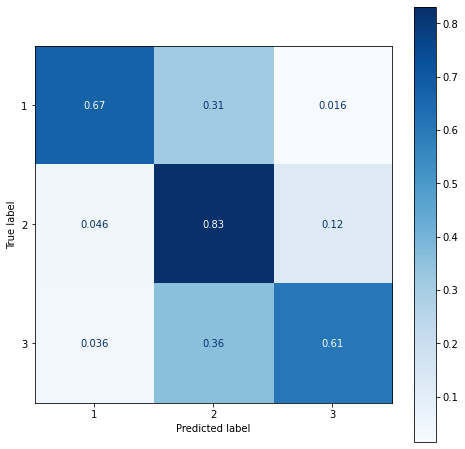

     Actual  Predicted
382       2          2
487       3          3
351       1          1
14        2          2
145       2          2
..      ...        ...
64        2          2
625       3          2
52        2          2
491       1          2
596       1          2

[157 rows x 2 columns]


In [31]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(svclassifier, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df3)

In [32]:
joblib.dump(svclassifier, 'NextGpaClassifier.joblib')

['NextGpaClassifier.joblib']